In [37]:
import nltk 
from nltk.tokenize import word_tokenize  
nltk.download('gutenberg')
from nltk.tokenize import sent_tokenize 
from nltk.probability import FreqDist 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.corpus import names 



[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/noraelruwie/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


# Part One: 12 points

In [38]:
nltk.corpus.gutenberg.fileids() 

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [39]:
paradise = nltk.corpus.gutenberg.words('milton-paradise.txt')
paradise_lower = [word.lower() for word in paradise]
len(paradise_lower)

96825

In [40]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
word = 'paradise'
print(lemmatizer.lemmatize(word))

paradise


In [41]:
sw = set(nltk.corpus.stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [42]:
import string 
punctuation = set(string.punctuation)
paradise_one = [word for word in paradise_lower if word not in sw and word not in punctuation]
fdist = FreqDist(paradise_one) 
top_twenty = fdist.most_common(20)
top_twenty


[('thou', 432),
 ('heaven', 419),
 ('thy', 414),
 ('thee', 358),
 ('thus', 318),
 ('shall', 283),
 ('god', 260),
 ('yet', 228),
 ('earth', 217),
 ('though', 217),
 ('us', 187),
 ('man', 176),
 ('first', 175),
 ('high', 153),
 ('one', 142),
 ('far', 129),
 ('death', 126),
 ('may', 126),
 ('great', 123),
 ('till', 120)]

In [43]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


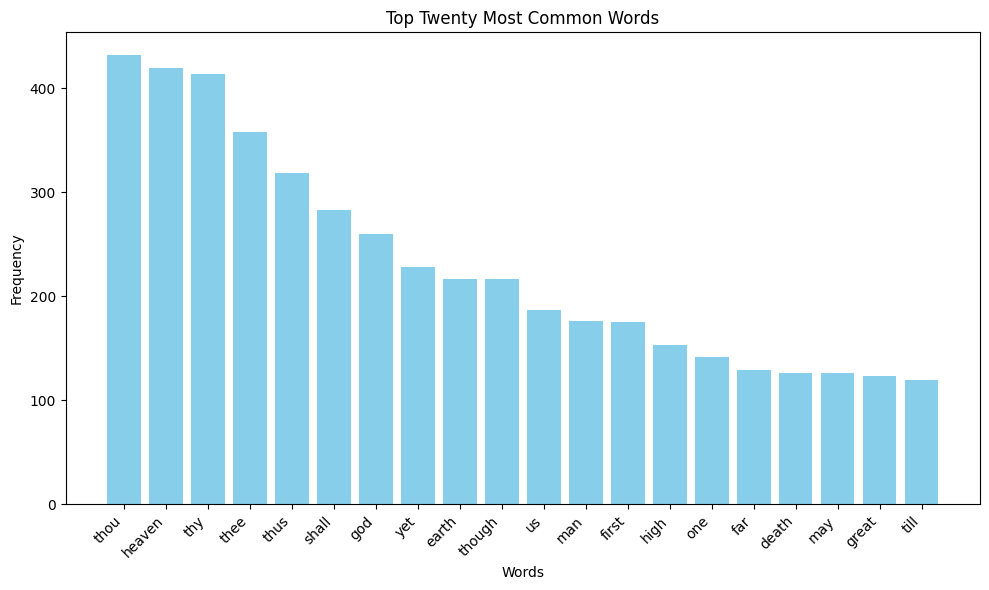

In [44]:
import matplotlib.pyplot as plt

words = [pair[0] for pair in top_twenty]
frequencies = [pair[1] for pair in top_twenty]

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Twenty Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


* I chose lemmatization due to it being more accurate than stemming since it looks through an actual dicitonary to connect the words and is far more accurate than stemming. 

# Part Two: 10 points

In [45]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/noraelruwie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
paradise_text = ' '.join(paradise_lower)
sentiment = analyzer.polarity_scores(paradise_text)
sentiment 

{'neg': 0.135, 'neu': 0.672, 'pos': 0.193, 'compound': 1.0}

In [47]:
sentences = nltk.sent_tokenize(paradise_text)
sentiment_scores = []
for sentence in sentences:
    sentiment_score = analyzer.polarity_scores(sentence)
    sentiment_scores.append((sentence, sentiment_score['compound']))
sentiment_scores.sort(key = lambda x: x[1])
most_negative = sentiment_scores[:5]
most_neutral = sentiment_scores[len(sentiment_scores)//2-2:len(sentiment_scores)//2+3]
most_positive = sentiment_scores[-5:]

print("Five Most Negative Sentences:")
for sentence, score in most_negative:
    print(sentence)
print("\nFive Most Neutral Sentences:")
for sentence, score in most_neutral:
    print(sentence) 
print("\nFive Most Positive Sentences:")
for sentence, score in most_positive:
    print(sentence)
      

Five Most Negative Sentences:
that now , while time was , our first parents had been warned the coming of their secret foe , and ' scaped , haply so ' scaped his mortal snare : for now satan , now first inflamed with rage , came down , the tempter ere the accuser of mankind , to wreak on innocent frail man his loss of that first battle , and his flight to hell : yet , not rejoicing in his speed , though bold far off and fearless , nor with cause to boast , begins his dire attempt ; which nigh the birth now rolling boils in his tumultuous breast , and like a devilish engine back recoils upon himself ; horrour and doubt distract his troubled thoughts , and from the bottom stir the hell within him ; for within him hell he brings , and round about him , nor from hell one step , no more than from himself , can fly by change of place : now conscience wakes despair , that slumbered ; wakes the bitter memory of what he was , what is , and what must be worse ; of worse deeds worse sufferings mu

* Given that paradise lost is an interpretation of the Bible with Milton's own interpretation of characters and plots I don't necessarily believe that the story is more neutral than anything else. With some research I found that paradise lost has a plot that centers around free will, fate, and destiny. I would not fit that under a neutral category, and I honestly believe negative and positive should both outweigh the neutral category. 
* With the sentences produced, I can understand why the sentiment analyzer would choose what it had considering it picks out key words, but I must disagree with some of the sentences already. Like "Hail Infernal World" would generally be seen as negative not neutral since infernal carries negative connotations 
* I think that if using a more advanced sentiment analyzer, the results would come out more accurate, but these results match up with the level of analyzer we are using in class. 